# Two-agent Fixed Priority Path Planning - Tube-basd Planning

In [1]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env

from panav.SAMP import Tube_Planning

import shapely
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

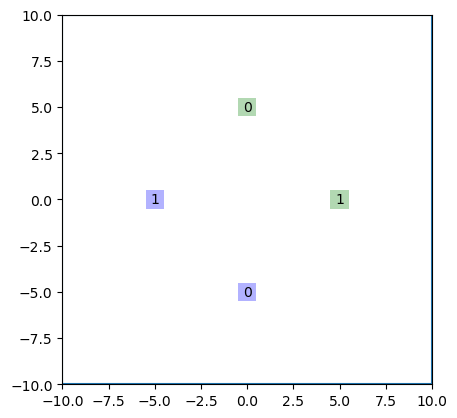

In [2]:

start_locs = np.array([[0,-5],[-5,0]])
goal_locs = np.array([[0,5],[5,0]])


start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

starts = [box_2d_center(s,start_box_side) for s in start_locs]

goals = [box_2d_center(g,goal_box_side) for g in goal_locs]


limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,[],starts,goals)

draw_env(env)

In [3]:
from panav.util import unique_tx, interpolate_positions

In [4]:
go_agent = 0
yield_agent = 1

bloating_r = 0.5

d = 2
K = 10
t0 = 0
vmax = 1.0
interp_dt = 0.1

In [5]:
# Planning for the agent with higher priority
start = env.starts[go_agent]
goal = env.goals[go_agent]
times,xs = Tube_Planning(env,start,goal,vmax,bloating_r,\
                                 [],\
                                d,K,t0)
times,xs = unique_tx(times,xs)


# Planning for the agent with lower priority
start = env.starts[yield_agent]
goal = env.goals[yield_agent]
t2,x2 = Tube_Planning(env,start,goal,vmax,bloating_r,\
                      [(times,xs)],\
                         d,K,t0)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-18


In [6]:
print('flowtime:',t2[-1] + times[-1])

flowtime: 25.45584412271571


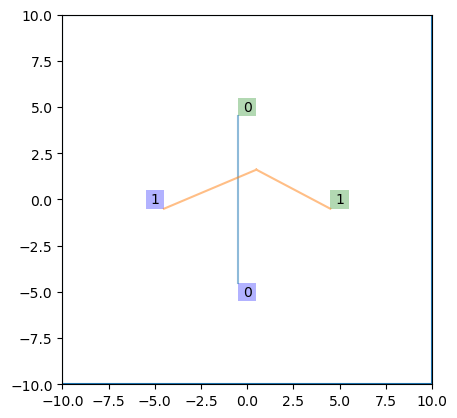

In [7]:
draw_env(env,[xs,x2])

# Animation

In [8]:
from panav.viz import animation
from IPython.display import HTML, display

In [9]:
times,xs = interpolate_positions(times,xs,interp_dt)
t2,x2 = interpolate_positions(t2,x2,interp_dt)

pos = [xs,x2]
anim = animation(env, pos, bloating_r, dt = interp_dt / 4)
display(HTML(anim.to_jshtml()))
plt.close()   # Avoid plotting an extra figure.

## More challenging environment

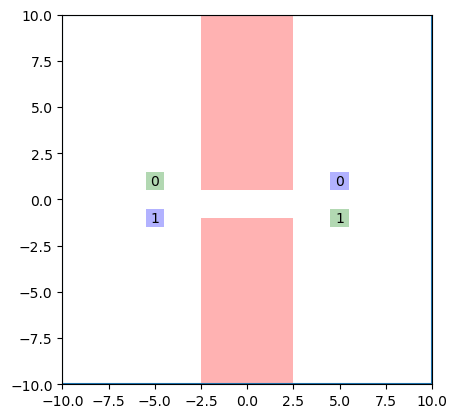

In [10]:

start_locs = np.array([[5,1],[-5,-1]])
goal_locs = np.array([[-5,1],[5,-1]])


start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

starts = [box_2d_center(s,start_box_side) for s in start_locs]

goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,[O1,O2],starts,goals)

draw_env(env)

In [16]:
# Planning for the agent with higher priority
start = env.starts[go_agent]
goal = env.goals[go_agent]
times,xs = Tube_Planning(env,start,goal,vmax,bloating_r,\
                                 [],\
                                d,K,t0)
times,xs = unique_tx(times,xs)

# Planning for the agent with lower priority
start = env.starts[yield_agent]
goal = env.goals[yield_agent]
t2,x2 = Tube_Planning(env,start,goal,vmax,bloating_r,\
                      [(times,xs)],\
                         d,4,t0) 
# By reducing the number of segments K, the number of integer variables will
# also reduce, which typically leads to more efficient solver performance.

In [12]:
print('flowtime:',t2[-1] + times[-1])

flowtime: 36.041382167423905


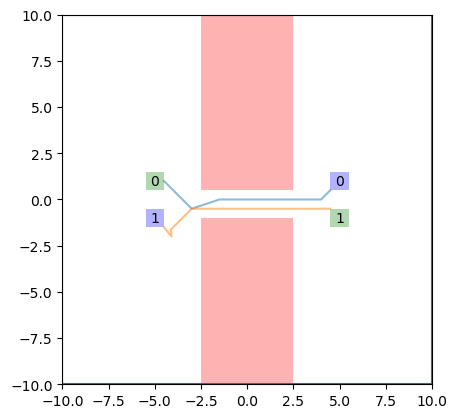

In [13]:
draw_env(env,[xs,x2])

In [14]:
from panav.viz import animation
from IPython.display import HTML, display

In [15]:
times,xs = interpolate_positions(times,xs,interp_dt)
t2,x2 = interpolate_positions(t2,x2,interp_dt)

pos = [xs,x2]
anim = animation(env, pos, bloating_r, dt = interp_dt / 4)
display(HTML(anim.to_jshtml()))
plt.close()   # Avoid plotting an extra figure.